In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyteomics import pepxml
from pandas.plotting import parallel_coordinates
from scipy import stats

# PXD004010

In [3]:
PXD004010perc = pd.read_csv("/home/robbe/ionbot/Percolator/PXD004010/percolator.target.psms.txt", sep="\t")

In [4]:
PXD004010perc.head()

,file_idx,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,percolator score,percolator q-value,percolator PEP,distinct matches/spectrum,sequence,protein id,flanking aa
0,1,90243,3,947.4869,2839.4389,2839.4325,6.854796,0.000006,5.999992e-32,46625,RAEGLGHEQTPLPAAQAQVQATGPEAGR,sp|Q96JE9|MAP6_HUMAN,RG
1,1,90073,3,947.4862,2839.4367,2839.4325,6.687075,0.000006,3.240559e-31,48901,RAEGLGHEQTPLPAAQAQVQATGPEAGR,sp|Q96JE9|MAP6_HUMAN,RG
2,4,84746,3,714.0106,2139.0100,2139.0093,6.157442,0.000006,6.662509e-29,41129,NLHQSGFSLSGSQADDHIAR,sp|O14531|DPYL4_HUMAN,RR
3,1,89883,3,947.4852,2839.4338,2839.4325,6.089849,0.000006,1.314708e-28,51645,RAEGLGHEQTPLPAAQAQVQATGPEAGR,sp|Q96JE9|MAP6_HUMAN,RG
4,6,132815,3,958.4350,2872.2832,2872.2756,5.845710,0.000006,1.531215e-27,52721,VPFDAATLHTSTAMAAQHGMDDDGTGQK,sp|P06396|GELS_HUMAN,RQ


In [5]:
#zie percolator log
filedict = {0:"ad_pl01", 1:"ad_pl02", 2:"ad_pl03", 3:"ad_pl04", 4:"ad_pl05", 5:"ad_pl06", 6:"ad_pl07", 7:"ad_pl08", 8:"ad_pl09",9:"ad_pl10"}

In [6]:
PXD004010perc["file_idx"].replace(filedict, inplace=True) 

In [7]:
PXD004010perc

,file_idx,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,percolator score,percolator q-value,percolator PEP,distinct matches/spectrum,sequence,protein id,flanking aa
0,ad_pl02,90243,3,947.4869,2839.4389,2839.4325,6.854796,0.000006,5.999992e-32,46625,RAEGLGHEQTPLPAAQAQVQATGPEAGR,sp|Q96JE9|MAP6_HUMAN,RG
1,ad_pl02,90073,3,947.4862,2839.4367,2839.4325,6.687075,0.000006,3.240559e-31,48901,RAEGLGHEQTPLPAAQAQVQATGPEAGR,sp|Q96JE9|MAP6_HUMAN,RG
2,ad_pl05,84746,3,714.0106,2139.0100,2139.0093,6.157442,0.000006,6.662509e-29,41129,NLHQSGFSLSGSQADDHIAR,sp|O14531|DPYL4_HUMAN,RR
3,ad_pl02,89883,3,947.4852,2839.4338,2839.4325,6.089849,0.000006,1.314708e-28,51645,RAEGLGHEQTPLPAAQAQVQATGPEAGR,sp|Q96JE9|MAP6_HUMAN,RG
4,ad_pl07,132815,3,958.4350,2872.2832,2872.2756,5.845710,0.000006,1.531215e-27,52721,VPFDAATLHTSTAMAAQHGMDDDGTGQK,sp|P06396|GELS_HUMAN,RQ
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147982,ad_pl07,76201,4,340.9796,1359.8893,1358.8886,-1.661425,0.460258,1.000000e+00,36,AK[14.02]LK[42.01]PGAPLR[14.02]PK[14.02],sp|P21333|FLNA_HUMAN,KL
1147983,ad_pl04,129414,4,349.6969,1394.7585,1393.7630,-1.663481,0.460258,1.000000e+00,9685,LMLRT[203.08]GLLM[15.99]K,sp|Q96QE4|LR37B_HUMAN,KL
1147984,ad_pl05,16315,4,351.9404,1403.7325,1403.7499,-1.664964,0.460258,1.000000e+00,16180,AAANQMRNFLVR[14.02],sp|P0C0L4|CO4A_HUMAN,KA
1147985,ad_pl03,84322,4,369.6843,1474.7079,1474.7123,-1.690574,0.460258,1.000000e+00,17074,LPGTS[203.08]HGGSK[162.05]K[42.01],sp|A6NHR9|SMHD1_HUMAN,KL


In [8]:
ionbotPXD004010 = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD004010/ionbot_files/ionbotPXD004010.csv")

In [9]:
ionbotPXD004010["spectrum_file"] = ionbotPXD004010["spectrum_file"].str[:-4]

In [10]:
PEPS = pd.merge(PXD004010perc, ionbotPXD004010, left_on=["file_idx","scan"], right_on=["spectrum_file", "scan"], how="outer")

In [11]:
PEPS.head()

,file_idx,scan,charge_x,spectrum precursor m/z,spectrum neutral mass,peptide mass,percolator score,percolator q-value,percolator PEP,distinct matches/spectrum,...,matched_peptide,modifications,modifications_delta,corrected_retention_time,unexpected_modification,database,psm_score,q-value,PEP,proteins
0,ad_pl02,90243,3.0,947.4869,2839.4389,2839.4325,6.854796,0.000006,5.999992e-32,46625.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ad_pl02,90073,3.0,947.4862,2839.4367,2839.4325,6.687075,0.000006,3.240559e-31,48901.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ad_pl05,84746,3.0,714.0106,2139.0100,2139.0093,6.157442,0.000006,6.662509e-29,41129.0,...,NLHQSGFSLSGSQADDHIAR,NaN,0|,15393.8706,NaN,T,4.82144,0.00002,0.0,DPYL4_HUMAN((533-553))((O14531))
3,ad_pl02,89883,3.0,947.4852,2839.4338,2839.4325,6.089849,0.000006,1.314708e-28,51645.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ad_pl07,132815,3.0,958.4350,2872.2832,2872.2756,5.845710,0.000006,1.531215e-27,52721.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
scanstocompare = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/OBV_lijst/psmstoscan_corrected.tsv", sep="\t")

In [14]:
scanstocompare.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Sequence,Site,PTM,Project_x,Peptide,spectrum,scannumber,Spectrum_file,ionbot_PSM,fragger_PSM,pfind_PSM,Found_by_ionbot,Found_by_MSFragger,Found_by_pFind
0,0,0,0,AQGPAASAEEPKPVEAPAANSDQTVTVKE,K12,Acetyl,PXD002516,AQGPAASAEEPKPVEAPAANSDQTVTVKE,131113_Sunil_PPT_Brain_A_14.07464.07464.3,7464,131113_Sunil_PPT_Brain_A_14,NaN,AQGPAASAEEPKPVEAPAANSDQTVTVKE/nan/Mod1: Acetyl...,"AQGPAASAEEPKPVEAPAANSDQTVTVKE/0,Acetyl[AnyN-te...",0,1,1
1,1,1,1,AQGPAASAEEPKPVEAPAANSDQTVTVKE,K12,Acetyl,PXD002516,AQGPAASAEEPKPVEAPAANSDQTVTVKE,131113_Sunil_PPT_Brain_A_12.06605.06605.3,6605,131113_Sunil_PPT_Brain_A_12,NaN,NaN,NaN,0,1,1
2,2,2,2,AQGPAASAEEPKPVEAPAANSDQTVTVKE,K12,Acetyl,PXD002516,AQGPAASAEEPKPVEAPAANSDQTVTVKE,131121_Sunil_Prot_BrainAmine_AProfile_15.08163...,8163,131121_Sunil_Prot_BrainAmine_AProfile_15,NaN,AQGPAASAEEPKPVEAPAANSDQTVTVKE/nan/Mod1: Acetyl...,"AQGPAASAEEPKPVEAPAANSDQTVTVKE/0,Acetyl[Protein...",0,1,1
3,3,3,3,AQGPAASAEEPKPVEAPAANSDQTVTVKE,K12,Acetyl,PXD002516,AQGPAASAEEPKPVEAPAANSDQTVTVKE,131119_Sunil_Prot_BrainAmine_ACentroid_15.0816...,8166,131119_Sunil_Prot_BrainAmine_ACentroid_15,NaN,AQGPAASAEEPKPVEAPAANSDQTVTVKE/nan/Mod1: Acetyl...,NaN,0,1,1
4,4,4,4,AQGPAASAEEPKPVEAPAANSDQTVTVKE,K12,Acetyl,PXD002516,AQGPAASAEEPKPVEAPAANSDQTVTVKE,131119_Sunil_Prot_BrainAmine_ACentroid_15.0834...,8341,131119_Sunil_Prot_BrainAmine_ACentroid_15,NaN,NaN,NaN,0,1,1


In [15]:
scannumbers = scanstocompare[scanstocompare["Found_by_ionbot"] == 0][["scannumber","Spectrum_file"]]

In [16]:
SOI_PEP = pd.merge(PEPS, scannumbers, left_on=["file_idx","scan"], right_on=["Spectrum_file","scannumber"], how="inner")

In [17]:
data = SOI_PEP.filter(["file_idx","scan","percolator q-value","percolator PEP","sequence","matched_peptide","modifications","unexpected_modification","q-value","PEP"])
data.rename(columns={"percolator PEP":"Comet PEP", "PEP": "ionbot PEP"}, inplace = True)
data["Comet PEP"] = data["Comet PEP"].round(5)

In [18]:
#Ik ga ervan uit dat de NA wil zeggen dat er geen confident PSM is gemaakt voor die scan
data = data[data["ionbot PEP"].notna()]
filtered_data = data[(data["percolator q-value"] < 0.01) & (data["ionbot PEP"].notna())]

In [19]:
filtered_data.head()

,file_idx,scan,percolator q-value,Comet PEP,sequence,matched_peptide,modifications,unexpected_modification,q-value,ionbot PEP
1,ad_pl08,113019,0.000006,0.0,SANGFPYR[0.98]EDEEGAFGEHGSQGTYSNTK,SANGFPYREDEEGAFGEHGSQGTYSNTK,NaN,NaN,0.00002,0.00000
2,ad_pl03,35137,0.000006,0.0,R[0.98]PQANSVESEQKEEWDK,RPQANSVESEQKEEWDK,NaN,NaN,0.00003,0.00043
3,ad_pl08,113162,0.000006,0.0,SANGFPYR[0.98]EDEEGAFGEHGSQGTYSNTK,SANGFPYREDEEGAFGEHGSQGTYSNTK,NaN,NaN,0.00002,0.00000
4,ad_pl07,109421,0.000006,0.0,SANGFPYR[0.98]EDEEGAFGEHGSQGTYSNTK,SANGFPYREDEEGAFGEHGSQGTYSNTK,NaN,NaN,0.00002,0.00000
5,ad_pl07,108430,0.000006,0.0,SANGFPYR[0.98]EDEEGAFGEHGSQGTYSNTK,SANGFPYREDEEGAFGEHGSQGTYSNTK,NaN,NaN,0.00002,0.00000


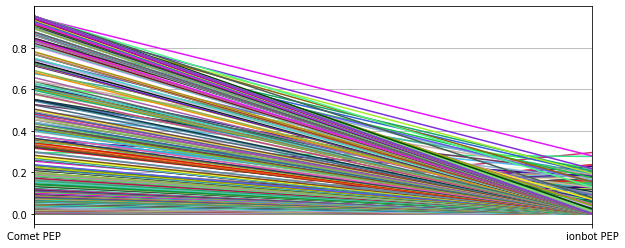

In [20]:
fig, ax = plt.subplots(figsize=(10,4))
parallel_coordinates(data,"sequence",["Comet PEP", "ionbot PEP"])
ax.legend_.remove()

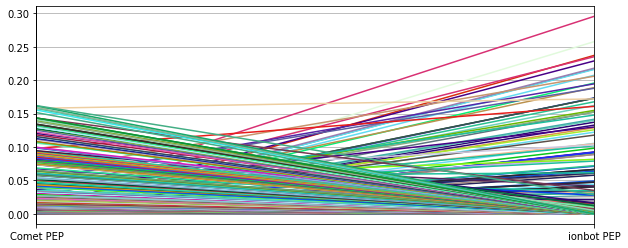

In [21]:
fig, ax = plt.subplots(figsize=(10,4))
parallel_coordinates(filtered_data,"sequence", ["Comet PEP","ionbot PEP"])
ax.legend_.remove()

In [22]:
res = stats.wilcoxon(x=data["Comet PEP"], y=data["ionbot PEP"])
print(res)

WilcoxonResult(statistic=44610.0, pvalue=2.1562422210583257e-60)


In [23]:
res = stats.wilcoxon(x=filtered_data["Comet PEP"], y=filtered_data["ionbot PEP"], alternative="greater")
print(res)

WilcoxonResult(statistic=103418.0, pvalue=3.125633470568579e-16)


# PXD002516

In [24]:
PXD002516perc = pd.read_csv("/home/robbe/ionbot/Percolator/PXD005216/percolator.target.psms.txt", sep="\t")

In [25]:
PXD002516perc.head()

,file_idx,scan,charge,spectrum precursor m/z,spectrum neutral mass,peptide mass,percolator score,percolator q-value,percolator PEP,distinct matches/spectrum,sequence,protein id,flanking aa
0,34,1507,3,734.0298,2199.0674,2199.0655,5.998991,0.000035,6.248467e-22,47020,KGEGTTTAEAAPATGSKPDEPGK,sp|P17677|NEUM_HUMAN,KA
1,88,20305,2,1038.4969,2074.9792,2074.9807,4.600075,0.000035,1.925375e-17,37953,VQAQHDYTATDTDELQLK,sp|O00499|BIN1_HUMAN,KA
2,35,11091,2,1113.0638,2224.1130,2224.1167,4.316880,0.000035,1.560321e-16,39715,LGEHNIDVLEGNEQFINAAK[14.02],sp|P00761|TRYP_PIG,RI
3,62,22622,2,1189.0873,2376.1601,2376.1669,4.296251,0.000035,1.817211e-16,47899,DIGAIAQVHAENGDIIAEEQQR,sp|Q16555|DPYL2_HUMAN,RI
4,55,4527,3,749.7452,2246.2138,2246.2131,4.181635,0.000035,4.238158e-16,10413,KAAVEALQSQALHATSQQPLR,sp|Q92599|SEPT8_HUMAN,RK


In [26]:
#zie percolator log
filedict2 = {0:"131023_Sunil_PPT_Brain_A_01", 1:"131023_Sunil_PPT_Brain_A_02", 2:"131023_Sunil_PPT_Brain_A_03", 3:"131023_Sunil_PPT_Brain_A_04", 4:"131023_Sunil_PPT_Brain_A_05", 5:"131023_Sunil_PPT_Brain_A_06", 6:"131023_Sunil_PPT_Brain_A_07", 7:"131023_Sunil_PPT_Brain_A_08", 8:"131023_Sunil_PPT_Brain_A_09", 9:"131023_Sunil_PPT_Brain_A_10", 10:"131023_Sunil_PPT_Brain_A_11", 11:"131023_Sunil_PPT_Brain_A_12",12:"131023_Sunil_PPT_Brain_A_13",13:"131023_Sunil_PPT_Brain_A_14",14:"131023_Sunil_PPT_Brain_A_15",15:"131023_Sunil_PPT_Brain_A_16",16:"131023_Sunil_PPT_Brain_A_17",17:"131023_Sunil_PPT_Brain_A_18",18:"131023_Sunil_PPT_Brain_A_19",19:"131023_Sunil_PPT_Brain_A_20",20:"131023_Sunil_PPT_Brain_A_21",21:"131023_Sunil_PPT_Brain_A_22",22:"131023_Sunil_PPT_Brain_A_23",23:"131023_Sunil_PPT_Brain_A_24",24:"131023_Sunil_PPT_Brain_A_25",25:"131023_Sunil_PPT_Brain_A_26",26:"131113_Sunil_PPT_Brain_A_01",27:"131113_Sunil_PPT_Brain_A_02",28:"131113_Sunil_PPT_Brain_A_03",29:"131113_Sunil_PPT_Brain_A_04",30:"131113_Sunil_PPT_Brain_A_05",31:"131113_Sunil_PPT_Brain_A_06",32:"131113_Sunil_PPT_Brain_A_07",33:"131113_Sunil_PPT_Brain_A_08",
34:"131113_Sunil_PPT_Brain_A_09", 35:"131113_Sunil_PPT_Brain_A_10", 36:"131113_Sunil_PPT_Brain_A_11", 37:"131113_Sunil_PPT_Brain_A_12", 38:"131113_Sunil_PPT_Brain_A_13", 39:"131113_Sunil_PPT_Brain_A_14", 40:"131113_Sunil_PPT_Brain_A_15", 41:"131113_Sunil_PPT_Brain_A_16", 42:"131113_Sunil_PPT_Brain_A_17", 43:"131113_Sunil_PPT_Brain_A_18", 44:"131113_Sunil_PPT_Brain_A_19", 45:"131113_Sunil_PPT_Brain_A_20", 46:"131113_Sunil_PPT_Brain_A_21", 47:"131113_Sunil_PPT_Brain_A_22", 48:"131113_Sunil_PPT_Brain_A_23", 49:"131113_Sunil_PPT_Brain_A_24", 50:"131113_Sunil_PPT_Brain_A_25", 51:"131113_Sunil_PPT_Brain_A_26", 52:"131119_Sunil_Prot_BrainAmine_ACentroid_01", 53:"131119_Sunil_Prot_BrainAmine_ACentroid_02", 54:"131119_Sunil_Prot_BrainAmine_ACentroid_03", 55:"131119_Sunil_Prot_BrainAmine_ACentroid_04", 56:"131119_Sunil_Prot_BrainAmine_ACentroid_05", 57:"131119_Sunil_Prot_BrainAmine_ACentroid_06", 58:"131119_Sunil_Prot_BrainAmine_ACentroid_07", 59:"131119_Sunil_Prot_BrainAmine_ACentroid_08", 60:"131119_Sunil_Prot_BrainAmine_ACentroid_09", 61:"131119_Sunil_Prot_BrainAmine_ACentroid_10", 62:"131119_Sunil_Prot_BrainAmine_ACentroid_11",
63:"131119_Sunil_Prot_BrainAmine_ACentroid_12", 64:"131119_Sunil_Prot_BrainAmine_ACentroid_13", 65:"131119_Sunil_Prot_BrainAmine_ACentroid_14", 66:"131119_Sunil_Prot_BrainAmine_ACentroid_15", 67:"131119_Sunil_Prot_BrainAmine_ACentroid_16", 68:"131119_Sunil_Prot_BrainAmine_ACentroid_17", 69:"131119_Sunil_Prot_BrainAmine_ACentroid_18", 70:"131119_Sunil_Prot_BrainAmine_ACentroid_19", 71:"131119_Sunil_Prot_BrainAmine_ACentroid_20", 72:"131119_Sunil_Prot_BrainAmine_ACentroid_21", 73:"131119_Sunil_Prot_BrainAmine_ACentroid_22", 74:"131119_Sunil_Prot_BrainAmine_ACentroid_23", 75:"131119_Sunil_Prot_BrainAmine_ACentroid_24", 76:"131119_Sunil_Prot_BrainAmine_ACentroid_25", 77:"131119_Sunil_Prot_BrainAmine_ACentroid_26", 78:"131121_Sunil_Prot_BrainAmine_AProfile_01", 79:"131121_Sunil_Prot_BrainAmine_AProfile_02", 80:"131121_Sunil_Prot_BrainAmine_AProfile_03", 81:"131121_Sunil_Prot_BrainAmine_AProfile_04", 82:"131121_Sunil_Prot_BrainAmine_AProfile_05", 83:"131121_Sunil_Prot_BrainAmine_AProfile_06", 84:"131121_Sunil_Prot_BrainAmine_AProfile_07", 85:"131121_Sunil_Prot_BrainAmine_AProfile_08", 86:"131121_Sunil_Prot_BrainAmine_AProfile_09",
87:"131121_Sunil_Prot_BrainAmine_AProfile_10", 88:"131121_Sunil_Prot_BrainAmine_AProfile_11", 89:"131121_Sunil_Prot_BrainAmine_AProfile_12", 90:"131121_Sunil_Prot_BrainAmine_AProfile_13", 91:"131121_Sunil_Prot_BrainAmine_AProfile_14", 92:"131121_Sunil_Prot_BrainAmine_AProfile_15", 93:"131121_Sunil_Prot_BrainAmine_AProfile_16", 94:"131121_Sunil_Prot_BrainAmine_AProfile_17", 95:"131121_Sunil_Prot_BrainAmine_AProfile_18", 96:"131121_Sunil_Prot_BrainAmine_AProfile_19", 97:"131121_Sunil_Prot_BrainAmine_AProfile_20", 98:"131121_Sunil_Prot_BrainAmine_AProfile_21", 99:"131121_Sunil_Prot_BrainAmine_AProfile_22", 100:"131121_Sunil_Prot_BrainAmine_AProfile_23", 101:"131121_Sunil_Prot_BrainAmine_AProfile_24", 102:"131121_Sunil_Prot_BrainAmine_AProfile_25", 103:"131121_Sunil_Prot_BrainAmine_AProfile_26"}


In [27]:
PXD002516perc["file_idx"].replace(filedict2, inplace=True) 

In [29]:
ionbotPXD002516 = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/OBV_lijst/ionbotPXD002516.csv")

In [30]:
ionbotPXD002516["spectrum_file"] = ionbotPXD002516["spectrum_file"].str[:-4]

In [31]:
ionbotPXD002516.head()

,ionbot_match_id,spectrum_title,scan,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,corrected_retention_time,unexpected_modification,database,psm_score,q-value,PEP,proteins
0,0_6653_2,controllerType=0 controllerNumber=1 scan=10006,10006,131023_Sunil_PPT_Brain_A_01,1158.62156,1158.62191,2170.63494,2,LAVNMVPFPR,LAVNMVPFPR,5|[35]oxidation[M],5|15.9949,2170.63494,NaN,T,0.02528,0.00296,0.22551,TBB1_HUMAN((253-263))((Q9H4B7))||TBB8_HUMAN((2...
1,0_6658_1,controllerType=0 controllerNumber=1 scan=10011,10011,131023_Sunil_PPT_Brain_A_01,1832.88472,1832.88456,2171.30970,3,TYFPHFDLSHGSAQVK,TYFPHFDLSHGSAQVK,NaN,0|,2183.86542,NaN,T,0.15405,0.00296,0.14552,HBA_HUMAN((42-58))((P69905))||sp|HBA_HUMAN|((4...
2,0_6683_1,controllerType=0 controllerNumber=1 scan=10039,10039,131023_Sunil_PPT_Brain_A_01,1489.73264,1489.73473,2175.70476,2,LQGIVSWGSGCAQK,LQGIVSWGSGCAQK,11|[4]carbamidomethyl[C],11|57.0215,2606.52804,NaN,T,1.88040,0.00296,0.00027,sp|TRY1_BOVIN|((207-221))((sp|TRY1_BOVIN|))
3,0_6689_2,controllerType=0 controllerNumber=1 scan=10045,10045,131023_Sunil_PPT_Brain_A_01,1832.88314,1832.88456,2176.51758,3,TYFPHFDLSHGSAQVK,TYFPHFDLSHGSAQVK,NaN,0|,2183.86542,NaN,T,0.17387,0.00296,0.13579,HBA_HUMAN((42-58))((P69905))||sp|HBA_HUMAN|((4...
4,0_6694_2,controllerType=0 controllerNumber=1 scan=10051,10051,131023_Sunil_PPT_Brain_A_01,875.51060,875.51164,2177.46510,2,IFLQDIK,IFLQDIK,NaN,0|,2187.44268,NaN,T,0.27192,0.00296,0.09598,FRIH_HUMAN((81-88))((P02794))


In [32]:
PEPS2 = pd.merge(PXD002516perc, ionbotPXD002516, left_on=["file_idx","scan"], right_on=["spectrum_file", "scan"], how="outer")

In [33]:
SOI_PEP2 = pd.merge(PEPS2, scannumbers, left_on=["file_idx","scan"], right_on=["Spectrum_file","scannumber"], how="inner")

In [34]:
data2 = SOI_PEP2.filter(["file_idx","scan","percolator q-value","percolator PEP","sequence","matched_peptide","modifications","unexpected_modification","q-value","PEP"])
data2.rename(columns={"percolator PEP":"Comet PEP", "PEP": "ionbot PEP"}, inplace = True)
data2["Comet PEP"] = data2["Comet PEP"].round(5)

In [35]:
data2 = data2[data2["ionbot PEP"].notna()]
filtered_data2 = data2[(data2["percolator q-value"] < 0.01) & (data2["ionbot PEP"].notna())]

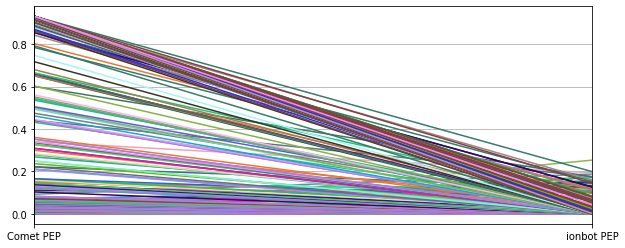

In [36]:
fig, ax = plt.subplots(figsize=(10,4))
parallel_coordinates(data2,"sequence",["Comet PEP", "ionbot PEP"])
ax.legend_.remove()

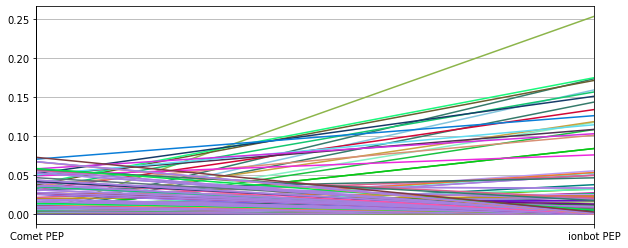

In [37]:
fig, ax = plt.subplots(figsize=(10,4))
parallel_coordinates(filtered_data2,"sequence", ["Comet PEP","ionbot PEP"])
ax.legend_.remove()

In [38]:
res = stats.wilcoxon(x=data2["Comet PEP"], y=data2["ionbot PEP"])
print(res)

WilcoxonResult(statistic=9157.0, pvalue=3.92282047091559e-34)


In [39]:
res = stats.wilcoxon(x=filtered_data2["Comet PEP"], y=filtered_data2["ionbot PEP"])
print(res)

WilcoxonResult(statistic=8561.0, pvalue=0.042130554618874355)


# Combined

In [40]:
datacombined = pd.concat([data,data2])

In [41]:
datacombinedfiltered = datacombined[datacombined["percolator q-value"] < 0.01]

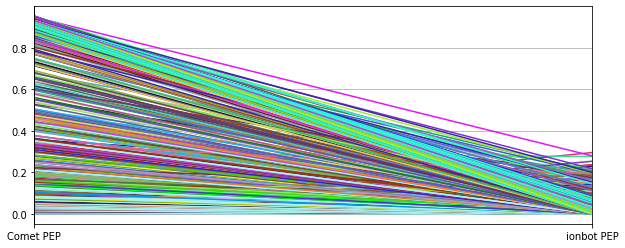

In [42]:
fig, ax = plt.subplots(figsize=(10,4))
parallel_coordinates(datacombined,"sequence",["Comet PEP", "ionbot PEP"])
ax.legend_.remove()

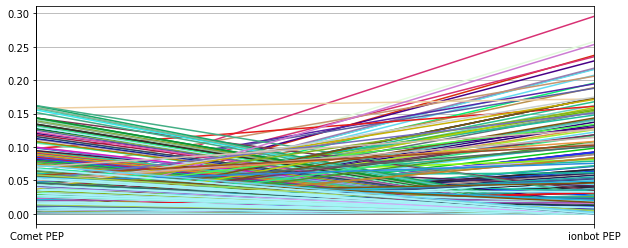

In [43]:
fig, ax = plt.subplots(figsize=(10,4))
parallel_coordinates(datacombinedfiltered,"sequence", ["Comet PEP","ionbot PEP"])
ax.legend_.remove()

In [44]:
res = stats.wilcoxon(x=datacombined["Comet PEP"], y=datacombined["ionbot PEP"])
print(res)

WilcoxonResult(statistic=94747.0, pvalue=3.67384959057116e-92)


In [45]:
res = stats.wilcoxon(x=datacombinedfiltered["Comet PEP"], y=datacombinedfiltered["ionbot PEP"])
print(res)

WilcoxonResult(statistic=92076.0, pvalue=1.5121590548604275e-15)


## Combine the plots

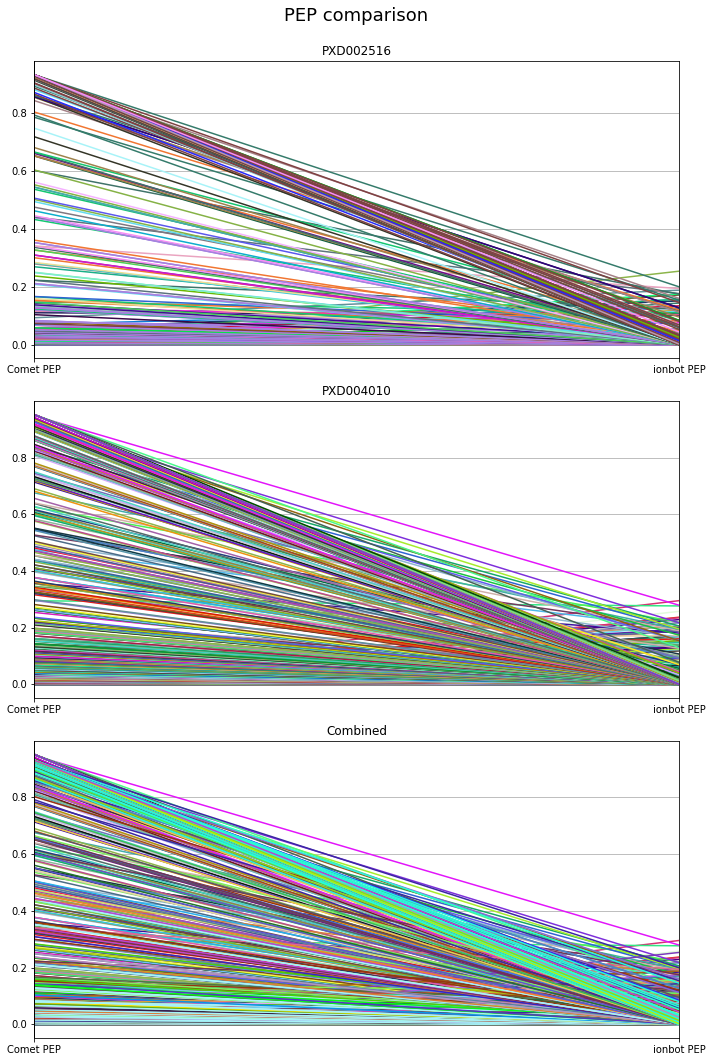

In [46]:
fig, ax = plt.subplots(3,1, figsize=(10,15))
parallel_coordinates(data,"sequence",["Comet PEP", "ionbot PEP"], ax=ax[1])
parallel_coordinates(data2,"sequence",["Comet PEP", "ionbot PEP"], ax=ax[0])
parallel_coordinates(datacombined,"sequence",["Comet PEP", "ionbot PEP"], ax=ax[2])
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()
ax[1].title.set_text("PXD004010")
ax[0].title.set_text("PXD002516")
ax[2].title.set_text("Combined")
plt.suptitle("PEP comparison", size=18)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

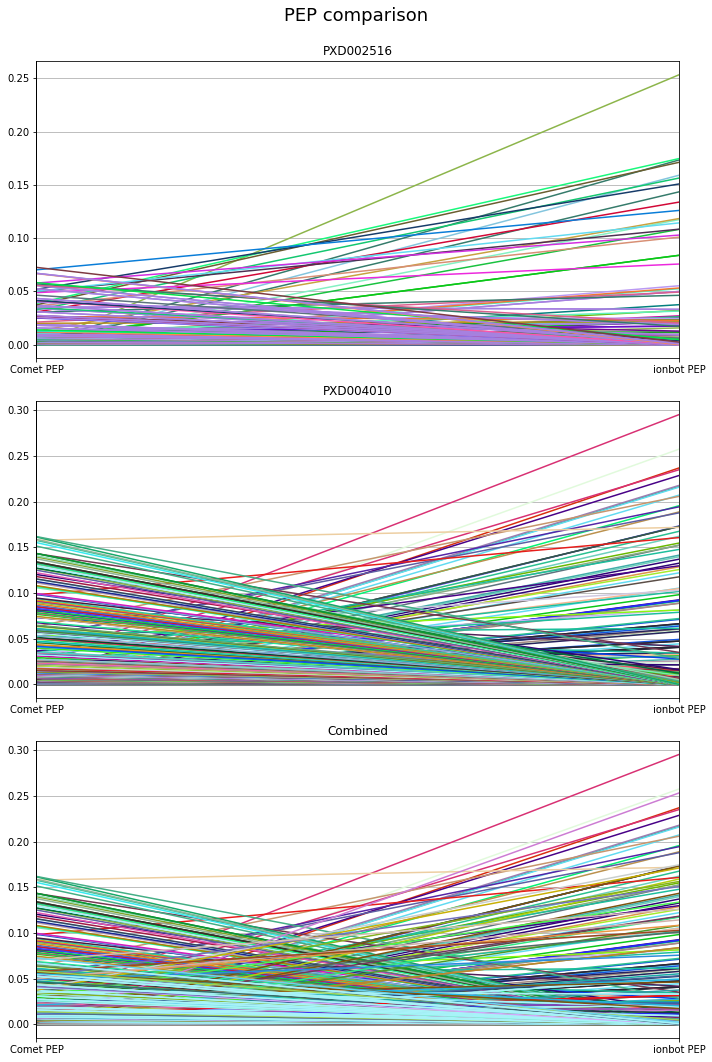

In [47]:
fig, ax = plt.subplots(3,1, figsize=(10,15))
parallel_coordinates(filtered_data,"sequence",["Comet PEP", "ionbot PEP"], ax=ax[1])
parallel_coordinates(filtered_data2,"sequence",["Comet PEP", "ionbot PEP"], ax=ax[0])
parallel_coordinates(datacombinedfiltered,"sequence",["Comet PEP", "ionbot PEP"], ax=ax[2])
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()
ax[1].title.set_text("PXD004010")
ax[0].title.set_text("PXD002516")
ax[2].title.set_text("Combined")
plt.suptitle("PEP comparison", size=18)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

# Adding MSFragger

In [49]:
frag004010 = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/OBV_lijst/FragpipePXD004010.tsv", sep="\t")
frag005216 = pd.read_csv("/home/robbe/ionbot/Voor_vergelijking_OSE/OBV_lijst/FragpipePXD002516.tsv", sep="\t")

In [50]:
frag004010["Spectrum File"] = frag004010["Spectrum"].str.split(".").str[0]
frag005216["Spectrum File"] = frag005216["Spectrum"].str.split(".").str[0]
frag004010["scan"] = frag004010["Spectrum"].str.split(".").str[1].astype(int)
frag005216["scan"] = frag005216["Spectrum"].str.split(".").str[1].astype(int)

In [51]:
frag004010["Fragger PEP"] = 1 - frag004010["PeptideProphet Probability"]
frag005216["Fragger PEP"] = 1 - frag005216["PeptideProphet Probability"]

In [52]:
scannumberswithfrag = scanstocompare[(scanstocompare["Found_by_ionbot"] == 0) & (scanstocompare["Found_by_MSFragger"] == 0)][["scannumber","Spectrum_file"]]

In [53]:
PEPSwithfrag = pd.merge(PEPS, frag004010, left_on=["file_idx","scan"], right_on=["Spectrum File", "scan"], how="outer")
PEPS2withfrag = pd.merge(PEPS2, frag005216, left_on=["file_idx", "scan"], right_on=["Spectrum File", "scan"], how="outer")

In [54]:
SOI_PEPwithfrag = pd.merge(PEPSwithfrag, scannumberswithfrag, left_on=["file_idx","scan"], right_on=["Spectrum_file","scannumber"], how="inner")
SOI_PEP2withfrag = pd.merge(PEPS2withfrag, scannumberswithfrag, left_on=["file_idx","scan"], right_on=["Spectrum_file","scannumber"], how="inner")

In [55]:
datawithfrag = SOI_PEPwithfrag.filter(["file_idx","scan","percolator q-value","percolator PEP","sequence","matched_peptide","modifications","unexpected_modification","q-value","PEP","Modified Peptide","Fragger PEP"])
datawithfrag.rename(columns={"percolator PEP":"Comet PEP", "PEP": "ionbot PEP"}, inplace = True)
datawithfrag["Comet PEP"] = datawithfrag["Comet PEP"].round(4)
datawithfrag["ionbot PEP"] = datawithfrag["ionbot PEP"].round(4)
data2withfrag = SOI_PEP2withfrag.filter(["file_idx","scan","percolator q-value","percolator PEP","sequence","matched_peptide","modifications","unexpected_modification","q-value","PEP","Modified Peptide","Fragger PEP"])
data2withfrag.rename(columns={"percolator PEP":"Comet PEP", "PEP": "ionbot PEP"}, inplace = True)
data2withfrag["Comet PEP"] = data2withfrag["Comet PEP"].round(4)
data2withfrag["ionbot PEP"] = data2withfrag["ionbot PEP"].round(4)

In [56]:
datawithfrag = datawithfrag[(datawithfrag["ionbot PEP"].notna()) & (datawithfrag["Fragger PEP"].notna())]
filtered_datawithfrag = datawithfrag[(datawithfrag["percolator q-value"] < 0.01) & (datawithfrag["ionbot PEP"].notna()) & (datawithfrag["Fragger PEP"].notna())]
data2withfrag = data2withfrag[(data2withfrag["ionbot PEP"].notna()) & (data2withfrag["Fragger PEP"].notna())]
filtered_data2withfrag = data2withfrag[(data2withfrag["percolator q-value"] < 0.01) & (data2withfrag["ionbot PEP"].notna()) & (data2withfrag["Fragger PEP"].notna())]

In [57]:
datacombinedwithfrag = pd.concat([datawithfrag,data2withfrag])
datacombinedwithfragfiltered = datacombinedwithfrag[datacombinedwithfrag["percolator q-value"] < 0.01]

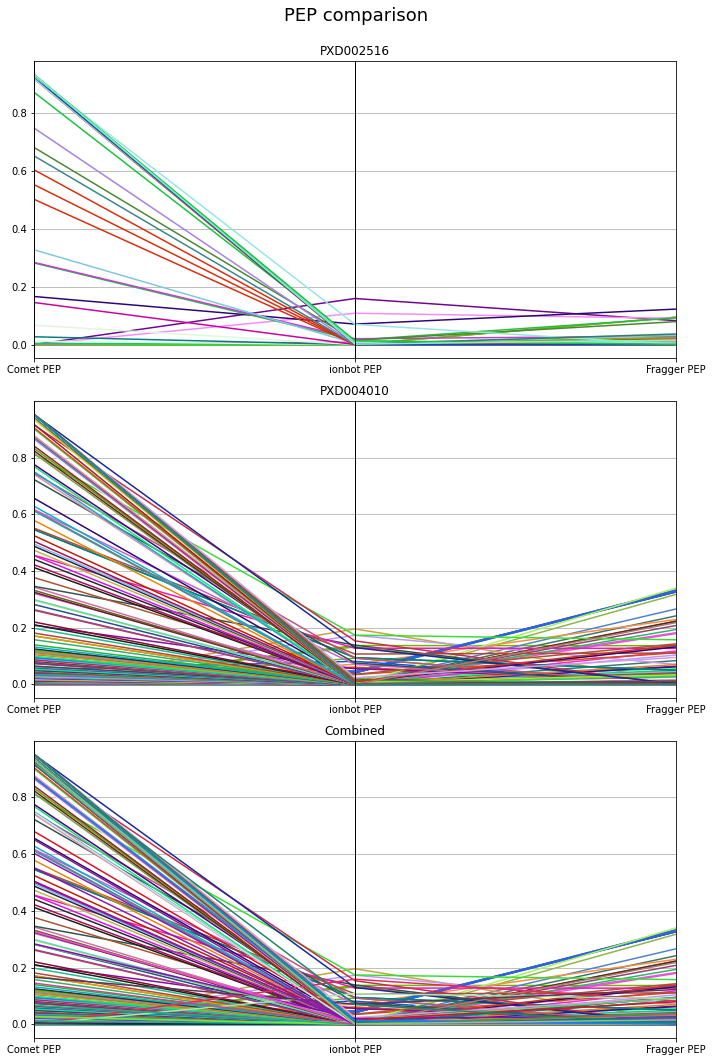

In [58]:
fig, ax = plt.subplots(3,1, figsize=(10,15))
parallel_coordinates(datawithfrag,"sequence",["Comet PEP", "ionbot PEP", "Fragger PEP"], ax=ax[1])
parallel_coordinates(data2withfrag,"sequence",["Comet PEP", "ionbot PEP", "Fragger PEP"], ax=ax[0])
parallel_coordinates(datacombinedwithfrag,"sequence",["Comet PEP", "ionbot PEP", "Fragger PEP"], ax=ax[2])
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()
ax[1].title.set_text("PXD004010")
ax[0].title.set_text("PXD002516")
ax[2].title.set_text("Combined")
plt.suptitle("PEP comparison", size=18)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

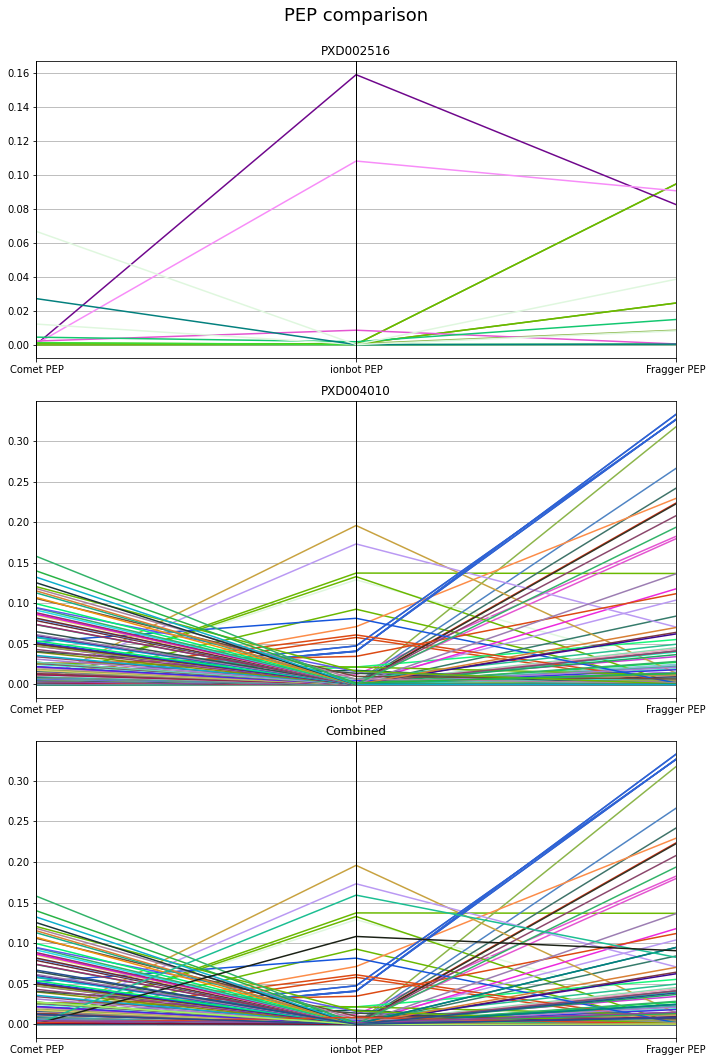

In [59]:
fig, ax = plt.subplots(3,1, figsize=(10,15))
parallel_coordinates(filtered_datawithfrag,"sequence",["Comet PEP", "ionbot PEP", "Fragger PEP"], ax=ax[1])
parallel_coordinates(filtered_data2withfrag,"sequence",["Comet PEP", "ionbot PEP", "Fragger PEP"], ax=ax[0])
parallel_coordinates(datacombinedwithfragfiltered,"sequence",["Comet PEP", "ionbot PEP", "Fragger PEP"], ax=ax[2])
ax[0].legend_.remove()
ax[1].legend_.remove()
ax[2].legend_.remove()
ax[1].title.set_text("PXD004010")
ax[0].title.set_text("PXD002516")
ax[2].title.set_text("Combined")
plt.suptitle("PEP comparison", size=18)
fig.tight_layout()
fig.subplots_adjust(top=0.93)